# Dimensionality reduction

## Load the dataset



In [ ]:
import pandas as pd

In [ ]:
from google.colab import files # Colab library to upload files to notebook

# Install kaggle package so that we can use the kaggle api e.g. for downloading data.  
!pip install kaggle

# Upload kaggle API key file
uploaded = files.upload()

!mkdir '/root/.kaggle'
!cp 'kaggle.json' '/root/.kaggle/.'
!chmod 600 '/root/.kaggle/kaggle.json'

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 96% 63.0M/66.0M [00:00<00:00, 114MB/s]
100% 66.0M/66.0M [00:00<00:00, 121MB/s]


We'll use https://www.kaggle.com/mlg-ulb/creditcardfraud data

In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df[df['Class'] == 0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
class_0 = df[df['Class'] == 0].index
class_0

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)

In [ ]:
df[df['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
class_1 = df[df['Class'] == 1].index
class_1

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)

In [ ]:
X = df.drop(columns=['Time', 'Class'])
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


# PCA / SVD

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
pca.explained_variance_

array([6.25618850e+04, 3.74536944e+00])

In [ ]:
pca.explained_variance_ratio_

array([9.99538016e-01, 5.98389762e-05])

In [ ]:
pca.singular_values_

array([1059.33784587,  947.29272051])

In [ ]:
pca.components_

array([[-9.56828645e-01, -1.60927222e-01, -4.33539123e-02,
         1.60675940e-02, -5.83134542e-02,  2.95733833e-02,
         4.53806091e-02, -1.08991499e-02, -3.98306673e-03,
        -8.88792505e-03,  3.57445195e-05, -6.71690594e-04,
         4.11895290e-04,  2.36887031e-03, -1.95142179e-04,
        -2.33955530e-04,  4.28096623e-04,  2.05879512e-03,
        -3.10245014e-03,  1.74037599e-02,  5.09457956e-03,
        -3.06544718e-03, -4.40842414e-03,  1.94093744e-04,
        -1.51256053e-03, -9.28456228e-05,  6.85406069e-04,
         1.96661665e-04,  2.22518891e-01],
       [ 2.61143429e-01, -8.30981501e-01, -1.50716594e-01,
         4.89621220e-02, -1.71877481e-01,  8.39704695e-02,
         1.21770692e-01, -2.86678553e-02, -1.00739350e-02,
        -2.25183434e-02,  7.15708801e-05, -1.68691575e-03,
         9.79850230e-04,  5.84287355e-03, -4.66542385e-04,
        -5.64064761e-04,  1.02414711e-03,  4.90952235e-03,
        -7.37677950e-03,  4.10988750e-02,  1.19721236e-02,
        -7.19

In [ ]:
pca_full = PCA()
pca_full.fit(X)

PCA()

In [ ]:
pca_full.explained_variance_

array([6.25618850e+04, 3.74536946e+00, 2.43618284e+00, 2.20493268e+00,
       1.99911234e+00, 1.81118821e+00, 1.66485707e+00, 1.43161065e+00,
       1.21186942e+00, 1.19656915e+00, 1.04185511e+00, 9.98643825e-01,
       9.90645706e-01, 9.23930822e-01, 8.38747569e-01, 8.35049904e-01,
       7.67766920e-01, 7.21293133e-01, 7.00997288e-01, 6.60474930e-01,
       5.44262222e-01, 5.28042326e-01, 4.02950986e-01, 3.66827787e-01,
       2.75175004e-01, 2.32560937e-01, 1.65681768e-01, 1.13310516e-01,
       1.06016215e-01])

In [ ]:
pca_full.explained_variance_ratio_

array([9.99538016e-01, 5.98389764e-05, 3.89223784e-05, 3.52277435e-05,
       3.19393954e-05, 2.89369713e-05, 2.65990695e-05, 2.28725408e-05,
       1.93617816e-05, 1.91173325e-05, 1.66454989e-05, 1.59551214e-05,
       1.58273371e-05, 1.47614475e-05, 1.34004927e-05, 1.33414159e-05,
       1.22664499e-05, 1.15239480e-05, 1.11996856e-05, 1.05522684e-05,
       8.69556251e-06, 8.43642066e-06, 6.43786275e-06, 5.86073004e-06,
       4.39641289e-06, 3.71557695e-06, 2.64706259e-06, 1.81033817e-06,
       1.69379866e-06])

In [ ]:
pca_full.singular_values_

array([133484.08223699,   1032.81348445,    832.97028097,    792.45066464,
          754.55893641,    718.2181214 ,    688.59369836,    638.53841084,
          587.49270728,    583.77227852,    544.72615656,    533.31018469,
          531.17025612,    512.9727496 ,    488.75386462,    487.67532523,
          467.61589529,    453.24233263,    446.82013575,    433.71329566,
          393.71200932,    387.80100916,    338.76667262,    323.22554788,
          279.94908856,    257.36112816,    217.22606083,    179.64274201,
          173.76436347])

### Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X['Amount'].values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [ ]:
norm_amount = scaler.fit_transform(X['Amount'].values.reshape(-1,1))

In [ ]:
norm_X = X.drop(columns=['Amount'])
norm_X['Amount'] = norm_amount

In [ ]:
norm_X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [ ]:
pca_full.fit(norm_X)

PCA()

In [ ]:
pca_full.explained_variance_

array([3.94021436, 3.15078871, 2.34418639, 2.07228289, 1.99344796,
       1.79774344, 1.61407212, 1.42997233, 1.20846085, 1.19113354,
       1.04185509, 0.99846948, 0.99059119, 0.91984171, 0.83781226,
       0.76784072, 0.72153154, 0.70743618, 0.68602576, 0.65692585,
       0.54293918, 0.52770241, 0.39647737, 0.36681957, 0.27311217,
       0.23254945, 0.16356272, 0.10906126, 0.04899505])

In [ ]:
pca_full.explained_variance_ratio_

array([0.12417222, 0.0992942 , 0.07387487, 0.06530608, 0.06282167,
       0.05665422, 0.05086599, 0.04506426, 0.03808353, 0.03753747,
       0.0328331 , 0.03146584, 0.03121757, 0.02898796, 0.02640288,
       0.02419779, 0.0227384 , 0.0222942 , 0.02161947, 0.02070241,
       0.01711023, 0.01663005, 0.01249462, 0.01155998, 0.00860688,
       0.00732858, 0.00515453, 0.00343697, 0.00154403])

In [ ]:
pca_full.singular_values_

array([1059.33785446,  947.29273665,  817.09139555,  768.24384113,
        753.48917721,  715.54742607,  678.00989958,  638.1729375 ,
        586.66591818,  582.4448292 ,  544.72615266,  533.26362939,
        531.15564033,  511.83633949,  488.4812779 ,  467.6383698 ,
        453.31723203,  448.8675407 ,  442.02290968,  432.54644174,
        393.23318223,  387.67616986,  336.03442353,  323.22192974,
        278.89780432,  257.35476996,  215.83244167,  176.24216957,
        118.12740391])

In [ ]:
np.linalg.norm(pca_full.components_[0], 2)

1.0000000000000002

In [ ]:
from numpy.linalg import svd

U, s, Vh = svd(norm_X, full_matrices=False)

In [ ]:
s

array([1059.33785446,  947.29273665,  817.09139555,  768.24384113,
        753.48917721,  715.54742607,  678.00989958,  638.1729375 ,
        586.66591818,  582.4448292 ,  544.72615266,  533.26362939,
        531.15564033,  511.83633949,  488.4812779 ,  467.6383698 ,
        453.31723203,  448.8675407 ,  442.02290968,  432.54644174,
        393.23318223,  387.67616986,  336.03442353,  323.22192974,
        278.89780432,  257.35476996,  215.83244167,  176.24216957,
        118.12740391])

In [ ]:
s**2/(norm_X.shape[0]-1) # variance

array([3.94021436, 3.15078871, 2.34418639, 2.07228289, 1.99344796,
       1.79774344, 1.61407212, 1.42997233, 1.20846085, 1.19113354,
       1.04185509, 0.99846948, 0.99059119, 0.91984171, 0.83781226,
       0.76784072, 0.72153154, 0.70743618, 0.68602576, 0.65692585,
       0.54293918, 0.52770241, 0.39647737, 0.36681957, 0.27311217,
       0.23254945, 0.16356272, 0.10906126, 0.04899505])

In [ ]:
pca = PCA(n_components=2)
pca.fit(norm_X)

PCA(n_components=2)

In [ ]:
pca.explained_variance_

array([3.94021436, 3.15078868])

In [ ]:
pca.explained_variance_ratio_

array([0.12417222, 0.0992942 ])

In [ ]:
pca.singular_values_

array([1059.33785443,  947.29273264])

In [ ]:
pca.components_

array([[-9.56828273e-01, -1.60926097e-01, -4.33533125e-02,
         1.60712857e-02, -5.83072938e-02,  2.95711841e-02,
         4.53861645e-02, -1.08980087e-02, -3.95660943e-03,
        -8.92767271e-03,  7.10424281e-06, -7.19657180e-04,
         3.96835635e-04,  2.38470391e-03, -1.99277241e-04,
        -2.41565758e-04,  4.29476145e-04,  2.05429570e-03,
        -3.10298027e-03,  1.74014029e-02,  5.09460829e-03,
        -3.06555118e-03, -4.40838636e-03,  1.94084598e-04,
        -1.51257364e-03, -9.28453196e-05,  6.85413272e-04,
         1.96663980e-04,  2.22520775e-01],
       [ 2.61143627e-01, -8.30980979e-01, -1.50715958e-01,
         4.89694612e-02, -1.71868511e-01,  8.39680387e-02,
         1.21785738e-01, -2.86621578e-02, -1.00265243e-02,
        -2.25687535e-02,  1.18197921e-05, -1.76542901e-03,
         9.84256673e-04,  5.78806346e-03, -5.15734483e-04,
        -5.81066545e-04,  1.02327788e-03,  4.90645676e-03,
        -7.37430515e-03,  4.10926880e-02,  1.19703883e-02,
        -7.19

### Plot

In [ ]:
[np.sum(pca_full.explained_variance_ratio_[:i+1]) for i in range(pca_full.explained_variance_ratio_.shape[0])]

[0.12417221700240606,
 0.22346641368378678,
 0.2973412830873642,
 0.36264736465276437,
 0.42546903639699823,
 0.48212326094312125,
 0.5329892533251945,
 0.5780535107154547,
 0.6161370383567824,
 0.6536745119737084,
 0.6865076131461222,
 0.7179734567799166,
 0.7491910233892551,
 0.7781789855294424,
 0.8045818652967321,
 0.828779656645442,
 0.8515180569787016,
 0.8738122549839407,
 0.8954317233369073,
 0.9161341349576935,
 0.9332443618057614,
 0.9498744159820194,
 0.9623690341821322,
 0.973929014362284,
 0.9825358922680542,
 0.9898644733321831,
 0.9950190012897947,
 0.9984559663142903,
 1.0]

In [ ]:
X_pca = pca.fit_transform(norm_X)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
X_pca_0 = np.take(X_pca, class_0, axis=0)
X_pca_1 = np.take(X_pca, class_1, axis=0)

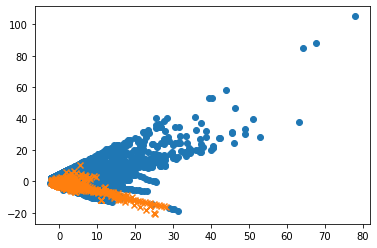

In [ ]:
plt.scatter(X_pca_0[:,0], X_pca_0[:,1], marker='o')
plt.scatter(X_pca_1[:,0], X_pca_1[:,1], marker='x')

## t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
!pip install MulticoreTSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1)

In [ ]:
df_1 = df[df['Class']==1]
df_0 = df[df['Class']==0].sample(len(df_1))
small_df = pd.concat([df_0,df_1],ignore_index=True)

In [ ]:
small_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,131021.0,-0.387454,-0.334426,1.478502,-1.717228,-0.134684,-0.490906,0.252130,-0.188693,1.378130,-1.324257,-0.388347,0.503462,0.346193,-0.429800,1.365645,-1.193520,0.139076,0.384535,1.421384,0.353818,0.359712,1.317465,-0.112703,1.173668,-0.167839,0.016412,0.008205,-0.045781,59.85,0
1,166604.0,-0.576355,1.659755,0.036853,0.589522,1.757105,-0.524933,1.632868,-0.226975,-1.146833,-1.234559,-0.660547,-0.249531,0.173999,-1.181456,-0.347953,-0.460648,1.117011,0.224041,0.129119,0.020852,-0.038120,0.021903,-0.652126,0.505432,1.245380,-0.310929,0.044355,0.083148,1.00,0
2,114821.0,-3.860131,-10.365843,-4.595364,1.498014,-3.186710,0.887022,3.608165,-0.767133,0.823242,-1.648141,0.562756,0.989509,0.353526,0.957812,0.411150,0.628204,-0.608728,0.967738,-0.140717,6.104636,1.854339,-1.515839,-2.512522,0.487966,-1.363372,0.239643,-0.648467,0.466795,3075.00,0
3,125930.0,-0.646509,0.972543,1.663306,-0.110665,0.114698,-0.419217,0.481668,0.112450,-0.079328,-1.318099,-0.703109,-0.761438,-0.825142,-1.235676,0.799571,0.578607,0.665519,0.435356,0.125991,-0.000289,-0.273691,-0.801329,-0.224785,-0.222298,0.128031,0.194446,0.040357,0.091701,9.99,0
4,169521.0,-2.263618,0.932343,0.183455,1.298600,-0.178226,1.016953,-1.563256,-1.498818,-0.691324,-1.209895,0.055598,1.782530,0.087103,0.858511,-1.709565,-0.299477,0.536502,-0.095106,1.300560,0.399136,-1.549459,-0.585438,0.163180,0.657172,-0.605676,-1.037856,-0.087542,-0.111139,27.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
small_class_0 = small_df[small_df['Class'] == 0].index
small_class_1 = small_df[small_df['Class'] == 1].index

In [ ]:
small_X = small_df.drop(columns=['Time','Class'])
small_X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.387454,-0.334426,1.478502,-1.717228,-0.134684,-0.490906,0.252130,-0.188693,1.378130,-1.324257,-0.388347,0.503462,0.346193,-0.429800,1.365645,-1.193520,0.139076,0.384535,1.421384,0.353818,0.359712,1.317465,-0.112703,1.173668,-0.167839,0.016412,0.008205,-0.045781,59.85
1,-0.576355,1.659755,0.036853,0.589522,1.757105,-0.524933,1.632868,-0.226975,-1.146833,-1.234559,-0.660547,-0.249531,0.173999,-1.181456,-0.347953,-0.460648,1.117011,0.224041,0.129119,0.020852,-0.038120,0.021903,-0.652126,0.505432,1.245380,-0.310929,0.044355,0.083148,1.00
2,-3.860131,-10.365843,-4.595364,1.498014,-3.186710,0.887022,3.608165,-0.767133,0.823242,-1.648141,0.562756,0.989509,0.353526,0.957812,0.411150,0.628204,-0.608728,0.967738,-0.140717,6.104636,1.854339,-1.515839,-2.512522,0.487966,-1.363372,0.239643,-0.648467,0.466795,3075.00
3,-0.646509,0.972543,1.663306,-0.110665,0.114698,-0.419217,0.481668,0.112450,-0.079328,-1.318099,-0.703109,-0.761438,-0.825142,-1.235676,0.799571,0.578607,0.665519,0.435356,0.125991,-0.000289,-0.273691,-0.801329,-0.224785,-0.222298,0.128031,0.194446,0.040357,0.091701,9.99
4,-2.263618,0.932343,0.183455,1.298600,-0.178226,1.016953,-1.563256,-1.498818,-0.691324,-1.209895,0.055598,1.782530,0.087103,0.858511,-1.709565,-0.299477,0.536502,-0.095106,1.300560,0.399136,-1.549459,-0.585438,0.163180,0.657172,-0.605676,-1.037856,-0.087542,-0.111139,27.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
980,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
981,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
982,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [ ]:
X_tsne = tsne.fit_transform(small_X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 984 samples in 0.000s...
[t-SNE] Computed neighbors for 984 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 984 / 984
[t-SNE] Mean sigma: 4.008665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.359791
[t-SNE] KL divergence after 1000 iterations: 0.375104


In [ ]:
X_tsne_0 = np.take(X_tsne, small_class_0, axis=0)
X_tsne_1 = np.take(X_tsne, small_class_1, axis=0)

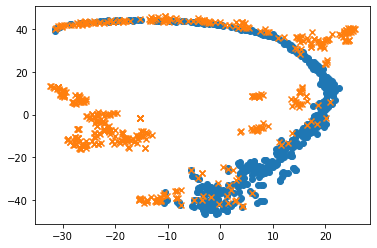

In [ ]:
plt.scatter(X_tsne_0[:,0], X_tsne_0[:,1], marker='o', label='Normal')
plt.scatter(X_tsne_1[:,0], X_tsne_1[:,1], marker='x', label='Fraud')

Other interactive tools to use T-SNE
https://projector.tensorflow.org/
